
# 🌼 기계학습 및 데이터 전처리 - 3차시(24.11.04)

---


## 1. 피처 엔지니어링의 개념과 중요성
- 피처 엔지니어링이란 데이터를 분석하고 모델을 만들 때 중요한 변수(feature)를 선택하거나 새롭게 생성하는 과정
- 데이터의 특성을 잘 이해하고 반영하여 유의미한 feature를 선택하는 것이 목표

In [388]:
import pandas as pd

In [389]:
data = {
    'A' : [1, 2, 3], 
    'B' : [4, 5, 6], 
    'C' : ['a', 'b', 'c']
}

In [390]:
df = pd.DataFrame(data)
df

,A,B,C
0,1,4,a
1,2,5,b
2,3,6,c


In [391]:
df['A+B'] = df['A'] + df['B']
df

,A,B,C,A+B
0,1,4,a,5
1,2,5,b,7
2,3,6,c,9


In [392]:
df['A+C'] = df['A'].map(str) + df['C']
df

,A,B,C,A+B,A+C
0,1,4,a,5,1a
1,2,5,b,7,2b
2,3,6,c,9,3c


## 2. 피처 선택과 상관관계 분석
- 피처 간 상관관계를 분석하여 어떤 변수들이 중요한 역할을 하는지 판단할 수 있음
1. 양의 상관관계 :  
두 변수 간에 하나가 증가하면 다른 하나도 증가하는 관계
2. 음의 상관관계 :  
한 변수가 증가할 때 다른 변수가 감소하는 관계

In [393]:
data = {
    '키': [150, 162, 168, 175, 185],   # 키 데이터
    '몸무게': [52, 59, 72, 78, 85],        # 몸무게 데이터
    '시험 점수': [82, 88, 79, 91, 85],         # 시험 점수
    '과제 점수': [81, 87, 80, 89, 86]  # 과제 점수
}

In [394]:
df = pd.DataFrame(data)
df

,키,몸무게,시험 점수,과제 점수
0,150,52,82,81
1,162,59,88,87
2,168,72,79,80
3,175,78,91,89
4,185,85,85,86


In [395]:
corr = df.corr()
print('각 열 간의 피어슨 상관계수')
corr

각 열 간의 피어슨 상관계수


,키,몸무게,시험 점수,과제 점수
키,1.000000,0.978827,0.311204,0.508026
몸무게,0.978827,1.000000,0.221651,0.402715
시험 점수,0.311204,0.221651,1.000000,0.970143
과제 점수,0.508026,0.402715,0.970143,1.000000


In [396]:
from scipy.stats import pearsonr, spearmanr

In [397]:
# 피어슨 상관계수
# 두 변수 간의 상관관계가 통계적으로 유의미한지 검정할 수 있는 p-value
pearson_corr, p_val = pearsonr(df['키'], df['몸무게'])
print(f'피어슨 상관계수, 키와 몸무게 : {pearson_corr}, {p_val}')

피어슨 상관계수, 키와 몸무게 : 0.9788265321005255, 0.003686699158616951


In [398]:
# 스피어만 상관계수
# 순서가 중요한 경우에 사용하는 상관계수
spearmanr_corr, p_val2 = spearmanr(df['시험 점수'], df['과제 점수'])
print(f'스피어만 상관계수, 시험과 과제 점수 : {spearmanr_corr}, {p_val2}')

스피어만 상관계수, 시험과 과제 점수 : 0.9999999999999999, 1.4042654220543672e-24


In [399]:
# pip install seaborn

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

In [401]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

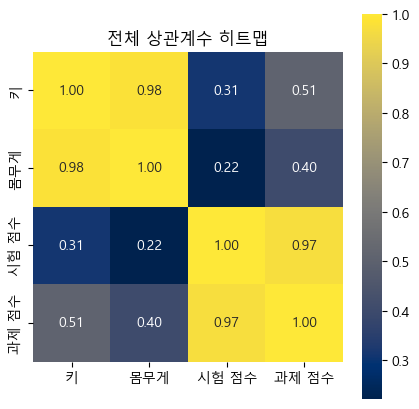

In [402]:
plt.figure(figsize = (5, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap = 'cividis',annot= True, square = True, fmt='.2f')
plt.title('전체 상관계수 히트맵')
plt.show()

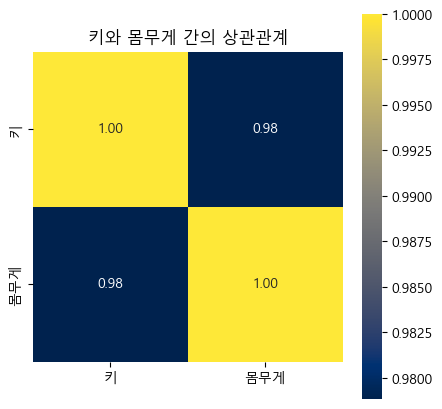

In [403]:
plt.figure(figsize = (5, 5))
high_corr = df[['키', '몸무게']]
sns.heatmap(high_corr.corr(), cmap = 'cividis',annot= True, square = True, fmt='.2f')
plt.title('키와 몸무게 간의 상관관계')
plt.show()

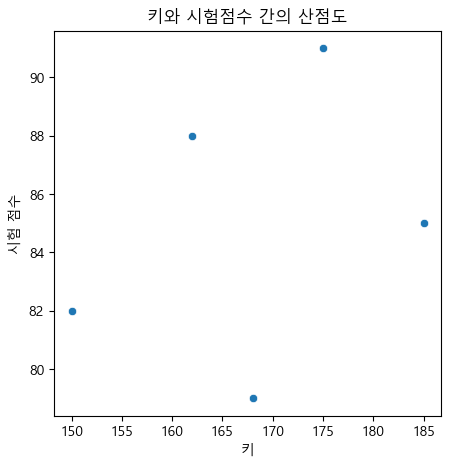

In [404]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data = df, x='키', y='시험 점수')
plt.title('키와 시험점수 간의 산점도')
plt.show()

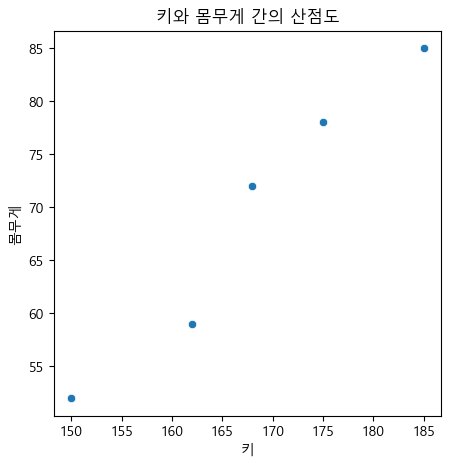

In [405]:
plt.figure(figsize = (5, 5))
sns.scatterplot(data = df, x='키', y='몸무게')
plt.title('키와 몸무게 간의 산점도')
plt.show()

## 4. 회귀 분석 - 선형 회귀 (Linear Regression)
- 독립 변수와 종속 변수 사이의 관계를 직선으로 나타내는 방법
- 독립 변수 값에 따라 종속 변수 예측

In [406]:
import pandas as pd


data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}

df = pd.DataFrame(data)

df.head()

,공부 시간,수면 시간,시험 점수
0,1,7,45
1,2,8,52
2,3,6,60
3,4,5,65
4,5,7,70


#### 1. 단순선형회귀

In [407]:
from sklearn.model_selection import train_test_split
X_simple = df[['공부 시간']]
y = df['시험 점수']

X_train_simple, X_test_simple, y_train, y_test = train_test_split(X_simple, y, test_size = 0.2, random_state=42)

In [408]:
X_test_simple

,공부 시간
13,2
39,10
30,3
45,9
17,8
48,10
26,7
25,8
32,2
19,10


In [409]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train_simple, y_train)

LinearRegression()

In [410]:
y_pred_simple = lr.predict(X_test_simple)

In [411]:
print(f'기울기 : {lr.coef_}, \n 예측 값 : {y_pred_simple}')
# 기울기가 5이기때문에 공부시간을 1시간 늘리면, 시험 점수가 평균적으로 5점 증가한다 라는 의미

기울기 : [5.11631317], 
 예측 값 : [52.85162741 93.78213273 57.96794057 88.66581957 83.5495064  93.78213273
 78.43319324 83.5495064  52.85162741 93.78213273]


In [412]:
result = pd.DataFrame({
    '공부 시간' : X_test_simple['공부 시간'],
    '실제 시험 점수' : y_test,
    '예측 시험 점수' : y_pred_simple
})
result

,공부 시간,실제 시험 점수,예측 시험 점수
13,2,48,52.851627
39,10,92,93.782133
30,3,56,57.967941
45,9,89,88.665820
17,8,82,83.549506
48,10,96,93.782133
26,7,78,78.433193
25,8,86,83.549506
32,2,50,52.851627
19,10,96,93.782133


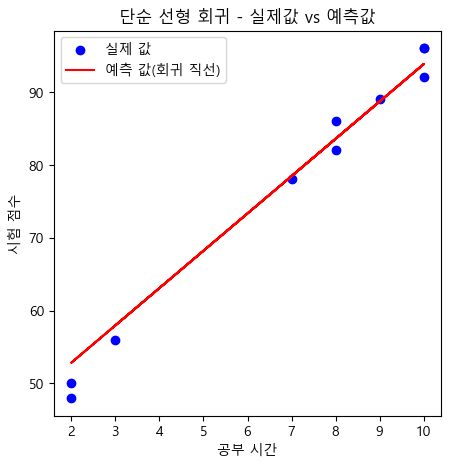

In [413]:
plt.figure(figsize = (5, 5))
plt.scatter(X_test_simple, y_test, color = 'blue', label = '실제 값')
plt.plot(X_test_simple, y_pred_simple, color='red', label = '예측 값(회귀 직선)')
plt.xlabel('공부 시간')
plt.ylabel('시험 점수')
plt.title('단순 선형 회귀 - 실제값 vs 예측값')
plt.legend()
plt.show()

#### 평가

In [414]:
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred_simple)
print(f'결정계수 : {r2}')

rmse = root_mean_squared_error(y_test, y_pred_simple)
print(f'평균제곱근오차(RMSE) : {rmse}')


결정계수 : 0.9821508223349446
평균제곱근오차(RMSE) : 2.3929468624953736


#### 2.다중선형회귀

In [415]:
df.head()

,공부 시간,수면 시간,시험 점수
0,1,7,45
1,2,8,52
2,3,6,60
3,4,5,65
4,5,7,70


In [416]:
X_multiple = df[['공부 시간', '수면 시간']]
y = df['시험 점수']
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y, test_size = 0.2, random_state = 42)

In [417]:
multi_lr = LinearRegression()
multi_lr.fit(X_train_multiple, y_train_multiple)
# 공부시간과 수면시간을 사용

LinearRegression()

In [418]:
y_pred_multiple = multi_lr.predict(X_test_multiple)

In [419]:
print(f'기울기 : {multi_lr.coef_} \n 예측 값 : {y_pred_multiple}')

기울기 : [5.13069024 0.13040057] 
 예측 값 : [52.59374502 93.63926694 57.72443526 88.76937783 83.63868759 93.63926694
 78.63839792 83.50828703 52.85454616 94.03046864]


In [420]:
result2 = pd.DataFrame({
    '공부 시간' : X_test_multiple['공부 시간'],
    '수면 시간' : X_test_multiple['수면 시간'],
    '실제 시험 점수' : y_test_multiple,
    '예측 시험 점수' : y_pred_multiple
})
result2

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
13,2,5,48,52.593745
39,10,5,92,93.639267
30,3,5,56,57.724435
45,9,7,89,88.769378
17,8,7,82,83.638688
48,10,5,96,93.639267
26,7,8,78,78.638398
25,8,6,86,83.508287
32,2,7,50,52.854546
19,10,8,96,94.030469


In [421]:
df_compare = pd.DataFrame({
    '실제 값' : y_test_multiple,
    '예측 값' : y_pred_multiple
    })

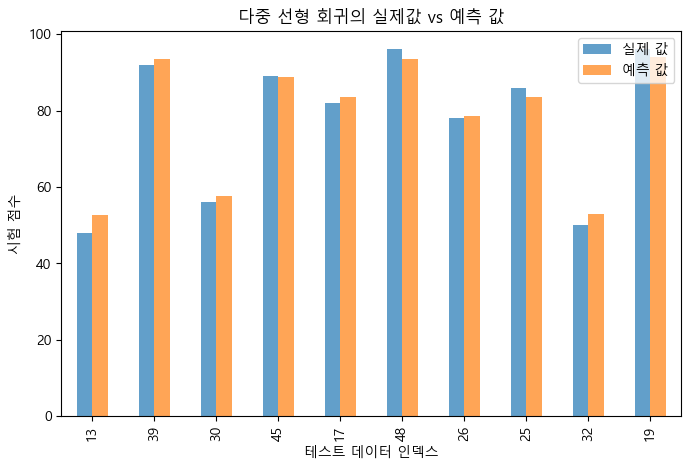

In [422]:
df_compare.plot(kind = 'bar', figsize = (8, 5), alpha = 0.7)
plt.xlabel('테스트 데이터 인덱스')
plt.ylabel('시험 점수')
plt.title('다중 선형 회귀의 실제값 vs 예측 값')
plt.legend()
plt.show()

#### 평가

In [423]:
r2 = r2_score(y_test_multiple, y_pred_multiple)
print(f'결정계수 : {r2}')

결정계수 : 0.9832553275845392


In [424]:
rmse = root_mean_squared_error(y_test_multiple, y_pred_multiple)
print(f'평균 제곱근 오차 (RMSE) : {rmse}')

평균 제곱근 오차 (RMSE) : 2.3177269808163308


## 4. 회귀 분석 - 로지스틱 회귀 (Logistic Regression)
- 이름엔 회귀가 들어가 있지만 회귀 모델이 아닌 분류 모델
- 독립 변수 값에 따라 종속 변수가 각 클래스에 속할 확률을 예측!
- 선형 회귀의 예측값을 시그모이드 함수에 통과시켜 0과 1사이의 확률값으로 변환

In [425]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [426]:
df = pd.read_csv('./data/Logistic_data.csv')
df.head(10)

,age,income,purchase
0,16.0,30196.0,1
1,38.0,71558.0,1
2,48.0,66315.0,1
3,48.0,23934.0,1
4,34.0,37159.0,1
5,24.0,37634.0,0
6,27.0,42151.0,1
7,25.0,23207.0,0
8,12.0,31015.0,0
9,23.0,47997.0,0


In [427]:
X = df[['age', 'income']]
y = df['purchase']

In [428]:
# 다음으로할일 : 데이터셋 나눠야죠
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [429]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [430]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [431]:
result = pd.DataFrame({
    'age' : X_test['age'],
    'income' : X_test['income'],
    '실제 구매 여부' : y_test,
    '예측 구매 여부' : y_pred
})
result.head()

,age,income,실제 구매 여부,예측 구매 여부
96,44.0,28632.0,1,1
181,29.0,50070.0,1,1
157,12.0,55163.0,0,0
75,19.0,49293.0,0,0
61,10.0,68777.0,0,0


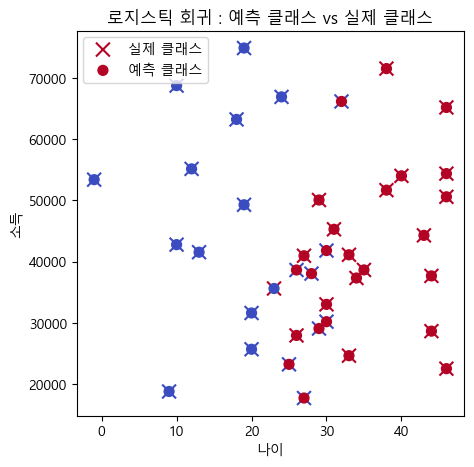

In [432]:
plt.figure(figsize = (5, 5))
plt.scatter(X_test['age'], X_test['income'], c=y_test, cmap='coolwarm', marker='x', s=100, label = '실제 클래스')
plt.scatter(X_test['age'], X_test['income'], c=y_pred, cmap='coolwarm', marker='o', s=50, label = '예측 클래스')
plt.xlabel('나이')
plt.ylabel('소득')
plt.title('로지스틱 회귀 : 예측 클래스 vs 실제 클래스')
plt.legend()
plt.show()

#### 로지스틱회귀의 평가

In [433]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [434]:
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도 : {accuracy}')

정확도 : 0.775


In [435]:
precision = precision_score(y_test, y_pred)
print(f'정밀도 : {precision}')

정밀도 : 0.7037037037037037


In [436]:
recall = recall_score(y_test, y_pred)
print(f'재현율 : {recall}')

재현율 : 0.95


In [437]:
f1 = f1_score(y_test, y_pred)
print(f'F1 score : {f1}')

F1 score : 0.8085106382978723


### K-FOLD

In [453]:
from sklearn.model_selection import KFold

# 데이터 준비
data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}
df = pd.DataFrame(data)
X = df[['공부 시간', '수면 시간']]
y = df['시험 점수']

In [454]:
kf = KFold(n_splits = 5, shuffle = True, random_state=42)
model = LinearRegression()

In [456]:
y_test_all = []
y_pred_all = []

In [459]:
for train_index, test_index in kf.split(X):
    # print(test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print(y_pred)
    y_test_all.extend(y_test)
    y_pred_all.extend(y_pred)

In [460]:
result_df = pd.DataFrame({
    '실제 값' : y_test_all,
    '예측 값' : y_pred_all
})
result_df.head()

,실제 값,예측 값
0,48,52.593745
1,82,83.638688
2,96,94.030469
3,86,83.508287
4,78,78.638398


In [461]:
len(result_df)

50

In [465]:
result_df['예측 값'].values

array([52.59374502, 83.63868759, 94.03046864, 83.50828703, 78.63839792,
       57.72443526, 52.85454616, 93.63926694, 88.76937783, 93.63926694,
       62.05340831, 67.93137382, 78.22327317, 89.10078519, 78.22327317,
       62.93182731, 78.22327317, 52.34712163, 78.80888584, 83.51562601,
       47.04603346, 73.53760276, 94.11666592, 88.86222294, 62.80936241,
       93.89731154, 73.53760276, 67.84445101, 63.02871679, 67.62509663,
       52.07438185, 56.8625717 , 73.28685079, 56.8625717 , 73.58109502,
       89.41688566, 88.82839722, 84.04020737, 46.10921511, 62.23924999,
       82.96028054, 58.43355042, 68.35876333, 77.71137193, 52.6120375 ,
       67.21355471, 46.79052458, 74.18027625, 57.86094611, 73.60767194])

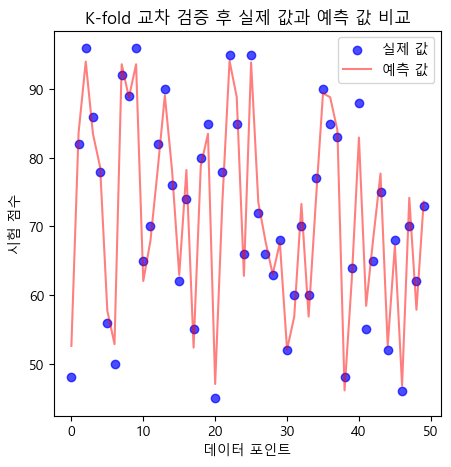

In [466]:
plt.figure(figsize = (5, 5))
# 실제 데이터의 값을 보여주는 산점도
plt.scatter(range(len(result_df)), result_df['실제 값'], color = 'blue', label = '실제 값', alpha =.7)
# 예측된 선 그래프, 회귀직선
plt.plot(result_df['예측 값'].values, color='red', label = '예측 값', alpha = .5)

plt.xlabel('데이터 포인트')
plt.ylabel('시험 점수')
plt.title('K-fold 교차 검증 후 실제 값과 예측 값 비교')
plt.legend()
plt.show()

In [469]:
r2 = r2_score(y_test_all, y_pred_all)
print(f'결정 계수 : {r2}')

결정 계수 : 0.9686334641097561


In [470]:
rmse = root_mean_squared_error(y_test_all, y_pred_all)
print(f'RMSE : {rmse}')

RMSE : 2.571042405950576


In [471]:
from sklearn.model_selection import KFold

# 데이터 준비
data = {
    '공부 시간': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 6, 7, 2, 5, 4, 9, 8, 7, 10,
               2, 3, 5, 6, 4, 8, 7, 10, 1, 9, 3, 6, 2, 5, 4, 9, 8, 7, 6, 10,
               1, 2, 3, 4, 5, 9, 7, 8, 10, 6],
    '수면 시간': [7, 8, 6, 5, 7, 8, 6, 5, 7, 6, 8, 7, 6, 5, 7, 8, 6, 7, 5, 8,
               7, 6, 5, 8, 7, 6, 8, 5, 6, 7, 5, 8, 7, 6, 8, 5, 7, 6, 8, 5,
               6, 8, 7, 6, 5, 7, 8, 6, 5, 7],
    '시험 점수': [45, 52, 60, 65, 70, 78, 82, 88, 90, 95, 55, 70, 76, 48, 65, 62,
               85, 82, 75, 96, 52, 60, 68, 77, 66, 86, 78, 95, 46, 90, 56, 72,
               50, 66, 63, 85, 83, 74, 70, 92, 48, 55, 62, 64, 68, 89, 80, 85, 96, 73]
}
df = pd.DataFrame(data)
X = df[['공부 시간', '수면 시간']]
y = df['시험 점수']

In [472]:
from sklearn.linear_model import Lasso

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [474]:
lasso_model = Lasso(alpha = 0.1)

In [475]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [476]:
y_pred = lasso_model.predict(X_test)

In [477]:
result = pd.DataFrame({
    '공부 시간' : X_test['공부 시간'],
    '수면 시간' : X_test['수면 시간'],
    '실제 시험 점수' : y_test,
    '예측 시험 점수' : y_pred
})

result.head()

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
13,2,5,48,52.864263
39,10,5,92,93.687842
30,3,5,56,57.967211
45,9,7,89,88.626322
17,8,7,82,83.523375


In [478]:
coef = lasso_model.coef_
coef

array([5.10294738, 0.02071367])

In [479]:
features_name = X.columns
features_name

Index(['공부 시간', '수면 시간'], dtype='object')

In [481]:
unimportant = []
important = {}

In [483]:
for i in range(len(coef)):
    if coef[i] == 0:
        unimportant.append(features_name[i])
    else :
        important[features_name[i]] = coef[i]

print(f'중요하지 않다고 판단된 feature : {unimportant}, \n 중요하다고 판단된 feature는 {important}')

중요하지 않다고 판단된 feature : [], 
 중요하다고 판단된 feature는 {'공부 시간': np.float64(5.102947379457568), '수면 시간': np.float64(0.020713672034482083)}


### L2, Ridge

In [484]:
from sklearn.linear_model import Ridge

In [485]:
ridge_model = Ridge(alpha = 1.5)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.5)

In [486]:
y_pred_ridge = ridge_model.predict(X_test)

In [487]:
y_pred_ridge

array([52.74506465, 93.5295861 , 57.84312983, 88.64284855, 83.54478337,
       93.5295861 , 78.552382  , 83.43911955, 52.95639228, 93.84657755])

In [488]:
result = pd.DataFrame({
    '공부 시간' : X_test['공부 시간'],
    '수면 시간' : X_test['수면 시간'],
    '실제 시험 점수' : y_test,
    '예측 시험 점수' : y_pred_ridge
})

result.head()

,공부 시간,수면 시간,실제 시험 점수,예측 시험 점수
13,2,5,48,52.745065
39,10,5,92,93.529586
30,3,5,56,57.843130
45,9,7,89,88.642849
17,8,7,82,83.544783


In [489]:
print(f'L2 정규화의 가중치 : {ridge_model.coef_}')

L2 정규화의 가중치 : [5.09806518 0.10566382]



## 🌼마무리 문제

아래 문제들을 풀어보세요!

Q1. 고양이와 강아지의 체중과 일일 활동 시간 데이터를 분석하여 상관관계를 확인해보세요.

In [439]:
data = {
    '동물 종류': ['고양이', '강아지', '고양이', '강아지', '고양이', '강아지'],
    '체중(kg)': [5, 20, 4, 15, 6, 25],
    '일일 활동 시간(분)': [60, 120, 80, 150, 70, 130]
}

In [440]:
df = pd.DataFrame(data)
df

,동물 종류,체중(kg),일일 활동 시간(분)
0,고양이,5,60
1,강아지,20,120
2,고양이,4,80
3,강아지,15,150
4,고양이,6,70
5,강아지,25,130


In [441]:
corr_df = df[['체중(kg)', '일일 활동 시간(분)']].corr()
corr_df

,체중(kg),일일 활동 시간(분)
체중(kg),1.000000,0.815034
일일 활동 시간(분),0.815034,1.000000


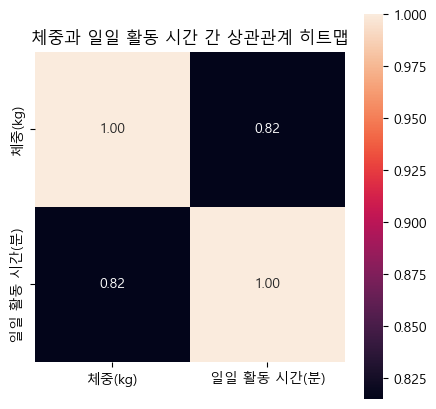

In [442]:
plt.figure(figsize = (5, 5))
high_corr = df[['체중(kg)', '일일 활동 시간(분)']]
sns.heatmap(high_corr.corr(), annot=True, square=True, fmt='.2f')
plt.title('체중과 일일 활동 시간 간 상관관계 히트맵')
plt.show()

Q2. 광고비에 따른 판매량에 대한 데이터를 분석하여 선형 회귀를 통해 예측을 생성해보세요.

In [443]:
data = {
    '광고비': [500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400,
             750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550, 1650],
    '판매량': [20, 23, 25, 28, 30, 34, 36, 40, 42, 45,
             27, 29, 31, 35, 37, 41, 43, 46, 48, 50]
}

In [444]:
df = pd.DataFrame(data)
df.head()

,광고비,판매량
0,500,20
1,600,23
2,700,25
3,800,28
4,900,30


In [445]:
X = df[['광고비']]
y = df['판매량']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [446]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [447]:
y_pred = model.predict(X_test)

In [448]:
print(f'기울기 : {model.coef_}')

기울기 : [0.02712455]


In [449]:
result_df = pd.DataFrame({
    '실제 판매량' : y_test,
    '예측 판매량' : y_pred
})
result_df

,실제 판매량,예측 판매량
0,20,19.805741
17,46,45.574065
15,41,40.149154
1,23,22.518196


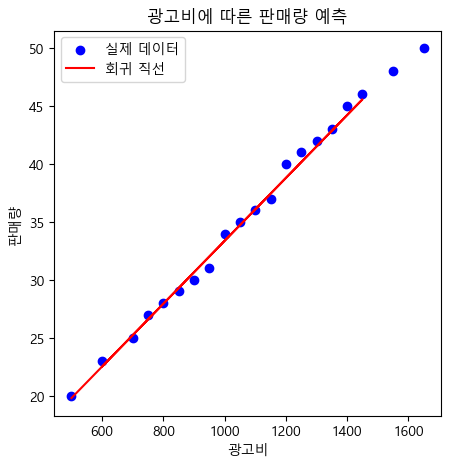

In [450]:
plt.figure(figsize = (5, 5))
plt.scatter(X, y, color = 'blue', label = '실제 데이터')
plt.plot(X_test, y_pred, color = 'red', label = '회귀 직선')
plt.xlabel('광고비')
plt.ylabel('판매량')
plt.title('광고비에 따른 판매량 예측')
plt.legend()
plt.show()

In [451]:
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'결정계수 : {r2}, RMSE : {rmse}')


결정계수 : 0.9976542287300302, RMSE : 0.5420404519625048


Q3. 공부 시간과 학업 성취도를 통해 학원 출석 여부를 예측해보세요

In [490]:
data = {
    '공부 시간': [1, 3, 2, 4, 5, 6, 2, 5, 4, 3, 7, 8, 5, 6, 3, 4, 2, 1, 6, 7],
    '학업 성취도': ['낮음', '보통', '낮음', '보통', '보통', '높음', '낮음', '보통', '보통', '낮음', '높음', '높음', '보통', '높음', '낮음', '보통', '낮음', '낮음', '높음', '높음'],
    '학원 출석 여부': [0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
}